In [1]:
suppressMessages(suppressWarnings(source("../config_duke.R")))

You are on Duke Server: DCC
BASE DIRECTORY:     /work/kk319 
WORK DIRECTORY:     /work/kk319/out/CombEffect_STARR 
LOG  DIRECTORY:     /work/kk319/out/CombEffect_STARR/log 
PATH OF SOURCE:     /work/kk319/source 
PATH OF EXECUTABLE: /work/kk319/exe 
PATH OF ANNOTATION: /work/kk319/annotation 


In [2]:
ctypes = c(col_character(), col_integer(), col_integer())
cnames = c("Chrom", "Loc", "Depth")
target = "target_PER1"
fdiry  = file.path(FD_WRK, "coverage", target)

fname  = "Input?_perbase.txt"
lst_input = lapply(Sys.glob(file.path(fdiry, fname)), function(fpath){
    sid = str_remove(basename(fpath), "_perbase.txt")
    dat = read_tsv(
        fpath, 
        col_types = ctypes, 
        col_names = cnames)
    dat$Sample = sid
    return(dat)
})

fname  = "TFX?_DMSO_perbase.txt"
lst_dmso = lapply(Sys.glob(file.path(fdiry, fname)), function(fpath){
    sid = str_remove(basename(fpath), "_perbase.txt")
    dat = read_tsv(
        fpath, 
        col_types = ctypes, 
        col_names = cnames)
    dat$Sample = sid
    return(dat)
})

fname  = "TFX?_Dex_perbase.txt"
lst_dex = lapply(Sys.glob(file.path(fdiry, fname)), function(fpath){
    sid = str_remove(basename(fpath), "_perbase.txt")
    dat = read_tsv(
        fpath, 
        col_types = ctypes, 
        col_names = cnames)
    dat$Sample = sid
    return(dat)
})

In [3]:
get_trt = function(txt){
    if (str_detect(txt, "Input")){
        trt = "Input"
    }
    if (str_detect(txt, "_.*")){
        trt = str_extract(txt, "_.*")
        trt = paste0("TFX", trt)
    }
    if (str_detect(txt, "total")){
        trt = "total"
    }
    return(trt)
}

In [4]:
ctypes = c(col_integer(), col_character())
cnames = c("Size", "Fpath")

fdiry = file.path(FD_WRK, "source")
fname = "library_size.txt"

dat_lib_size = read_tsv(
    file.path(fdiry, fname), 
    col_types = ctypes, 
    col_names = cnames)

dat_lib_size = dat_lib_size %>% mutate(Sample=tools::file_path_sans_ext(basename(Fpath)))
dat_lib_size = dat_lib_size %>% rowwise() %>% mutate(Trt=get_trt(Sample))

In [5]:
dat = dat_lib_size
lst_lib_sam = split(dat$Size, dat$Sample)

dat = dat_lib_size %>% group_by(Trt) %>% summarize(Size_tot = sum(Size))
lst_lib_trt = split(dat$Size_tot, dat$Trt)

In [6]:
dat = bind_rows(lst_input, lst_dmso, lst_dex) %>%
    mutate(Size = unlist(lst_lib_sam[Sample])) %>%
    mutate(Depth_norm = Depth / Size)
head(dat)

Chrom,Loc,Depth,Sample,Size,Depth_norm
chr17,8148000,10,Input1,18666630,5.357153e-07
chr17,8148001,10,Input1,18666630,5.357153e-07
chr17,8148002,10,Input1,18666630,5.357153e-07
chr17,8148003,10,Input1,18666630,5.357153e-07
chr17,8148004,10,Input1,18666630,5.357153e-07
chr17,8148005,10,Input1,18666630,5.357153e-07


In [7]:
mat_norm = dat %>% 
    dplyr::select(Loc, Depth_norm, Sample) %>% 
    spread(key=Sample, value=Depth_norm)
head(mat_norm)

Loc,Input1,Input2,Input3,Input4,Input5,TFX2_Dex,TFX2_DMSO,TFX3_Dex,TFX3_DMSO,TFX4_Dex,TFX4_DMSO,TFX5_Dex,TFX5_DMSO
8148000,5.357153e-07,6.445879e-07,8.161166e-07,1.105034e-06,7.177807e-07,1.67351e-06,9.807364e-07,6.43923e-07,1.86431e-06,4.047402e-07,1.001566e-06,7.799529e-07,1.212787e-06
8148001,5.357153e-07,6.445879e-07,8.161166e-07,1.105034e-06,7.177807e-07,1.69553e-06,1.003544e-06,6.43923e-07,1.86431e-06,4.047402e-07,1.001566e-06,7.799529e-07,1.212787e-06
8148002,5.357153e-07,6.445879e-07,8.161166e-07,1.105034e-06,7.177807e-07,1.69553e-06,1.026352e-06,6.43923e-07,1.86431e-06,4.047402e-07,1.001566e-06,7.799529e-07,1.212787e-06
8148003,5.357153e-07,6.445879e-07,8.161166e-07,1.105034e-06,7.177807e-07,1.69553e-06,1.003544e-06,6.43923e-07,1.86431e-06,4.047402e-07,1.001566e-06,7.799529e-07,1.212787e-06
8148004,5.357153e-07,6.941716e-07,8.161166e-07,1.157655e-06,7.177807e-07,1.69553e-06,1.003544e-06,6.43923e-07,1.86431e-06,4.047402e-07,1.001566e-06,7.563179e-07,1.212787e-06
8148005,5.357153e-07,6.941716e-07,8.161166e-07,1.157655e-06,7.177807e-07,1.69553e-06,1.003544e-06,6.43923e-07,1.86431e-06,4.047402e-07,1.001566e-06,7.090481e-07,1.212787e-06


In [8]:
mat_unorm = dat %>% 
    dplyr::select(Loc, Depth, Sample) %>% 
    spread(key=Sample, value=Depth)
head(mat_unorm)

Loc,Input1,Input2,Input3,Input4,Input5,TFX2_Dex,TFX2_DMSO,TFX3_Dex,TFX3_DMSO,TFX4_Dex,TFX4_DMSO,TFX5_Dex,TFX5_DMSO
8148000,10,13,19,21,11,76,43,17,50,14,31,33,35
8148001,10,13,19,21,11,77,44,17,50,14,31,33,35
8148002,10,13,19,21,11,77,45,17,50,14,31,33,35
8148003,10,13,19,21,11,77,44,17,50,14,31,33,35
8148004,10,14,19,22,11,77,44,17,50,14,31,32,35
8148005,10,14,19,22,11,77,44,17,50,14,31,30,35


In [9]:
set.seed(123)
tmp = mat_unorm
res = apply(tmp, 1, function(values){
    ### extract
    p = values["Loc"]
    y = values[c(paste0("TFX",   2:5, "_DMSO"))]
    x = values[c(paste0("Input", 1:5))]
    
    ### bootstrap
    ys = sample(y, size = 1000, replace = TRUE)
    xs = sample(x, size = 1000, replace = TRUE)
    rs = ys / xs
    
    ### stats
    mu  = mean(rs)
    med = median(rs)
    q25 = quantile(rs, probs = 0.25)
    q75 = quantile(rs, probs = 0.75)
    return(c(p, mu, med, q25, q75))
})

### arrange
res = t(res)
res = as.data.frame(res)
colnames(res) = c("Loc", "Mean", "Median", "Q25", "Q75")
res_dmso_unorm = res
head(res)

Loc,Mean,Median,Q25,Q75
8148000,2.922343,2.818182,2.047619,3.500000
8148001,2.919079,2.692308,2.260652,3.500000
8148002,2.974455,2.818182,2.368421,3.846154
8148003,2.922587,2.692308,2.095238,3.846154
8148004,3.020974,3.100000,2.214286,3.571429
8148005,2.934397,2.818182,2.214286,3.571429


In [10]:
set.seed(123)
tmp = mat_norm
res = apply(tmp, 1, function(values){
    ### extract
    p = values["Loc"]
    y = values[c(paste0("TFX",   2:5, "_DMSO"))]
    x = values[c(paste0("Input", 1:5))]
    
    ### bootstrap
    ys = sample(y, size = 1000, replace = TRUE)
    xs = sample(x, size = 1000, replace = TRUE)
    rs = ys / xs
    
    ### stats
    mu  = mean(rs)
    med = median(rs)
    q25 = quantile(rs, probs = 0.25)
    q75 = quantile(rs, probs = 0.75)
    return(c(p, mu, med, q25, q75))
})

### arrange
res = t(res)
res = as.data.frame(res)
colnames(res) = c("Loc", "Mean", "Median", "Q25", "Q75")
res_dmso_norm = res
head(res)

Loc,Mean,Median,Q25,Q75
8148000,1.764909,1.687107,1.227234,2.263864
8148001,1.748405,1.556877,1.395365,1.881492
8148002,1.781725,1.687107,1.395365,2.263864
8148003,1.744548,1.556877,1.229658,1.881492
8148004,1.791851,1.689634,1.395365,2.263864
8148005,1.759811,1.610420,1.395365,2.263864


In [11]:
set.seed(123)
tmp = mat_unorm
res = apply(tmp, 1, function(values){
    ### extract
    p = values["Loc"]
    y = values[c(paste0("TFX",   2:5, "_Dex"))]
    x = values[c(paste0("Input", 1:5))]
    
    ### bootstrap
    ys = sample(y, size = 1000, replace = TRUE)
    xs = sample(x, size = 1000, replace = TRUE)
    rs = ys / xs
    
    ### stats
    mu  = mean(rs)
    med = median(rs)
    q25 = quantile(rs, probs = 0.25)
    q75 = quantile(rs, probs = 0.75)
    return(c(p, mu, med, q25, q75))
})

### arrange
res = t(res)
res = as.data.frame(res)
colnames(res) = c("Loc", "Mean", "Median", "Q25", "Q75")
res_dex_unorm = res
head(res)

Loc,Mean,Median,Q25,Q75
8148000,2.564113,1.700000,1.272727,3.300000
8148001,2.638738,1.700000,1.076923,3.666667
8148002,2.605854,1.571429,1.272727,3.300000
8148003,2.577521,1.571429,1.076923,3.666667
8148004,2.654866,1.684211,1.214286,3.500000
8148005,2.512518,1.578947,1.214286,3.500000


In [12]:
set.seed(123)
tmp = mat_norm
res = apply(tmp, 1, function(values){
    ### extract
    p = values["Loc"]
    y = values[c(paste0("TFX",   2:5, "_Dex"))]
    x = values[c(paste0("Input", 1:5))]
    
    ### bootstrap
    ys = sample(y, size = 1000, replace = TRUE)
    xs = sample(x, size = 1000, replace = TRUE)
    rs = ys / xs
    
    ### stats
    mu  = mean(rs)
    med = median(rs)
    q25 = quantile(rs, probs = 0.25)
    q75 = quantile(rs, probs = 0.75)
    return(c(p, mu, med, q25, q75))
})

### arrange
res = t(res)
res = as.data.frame(res)
colnames(res) = c("Loc", "Mean", "Median", "Q25", "Q75")
res_dex_norm = res
head(res)

Loc,Mean,Median,Q25,Q75
8148000,1.214046,0.9989685,0.7058179,1.455909
8148001,1.243721,0.9989685,0.6279054,1.534369
8148002,1.227988,0.9556881,0.7058179,1.455909
8148003,1.217780,0.9556881,0.6279054,1.534369
8148004,1.250224,0.9276136,0.7555136,1.464625
8148005,1.189133,0.9276136,0.6124866,1.464625


In [13]:
gp1 = ggplot(res_dmso_unorm, aes(x=Loc, y=Median)) + 
    geom_ribbon(aes(ymin=Q25, ymax=Q75), alpha=0.2) +
    geom_line(size=0.5) +
    #geom_point(size=0.01) + 
    theme_bw() +
    labs(x="Location", y="Median(DMSO / Input)", title="Chr17:8148000-8160000")

gp2 = ggplot(res_dmso_norm, aes(x=Loc, y=Median)) + 
    geom_ribbon(aes(ymin=Q25, ymax=Q75), alpha=0.2) +
    geom_line(size=0.5) +
    #geom_point(size=0.01) + 
    theme_bw() +
    labs(x="Location", y="Normalized\nMedian(DMSO / Input)", title="Chr17:8148000-8160000")

gp3 = ggplot(res_dex_unorm, aes(x=Loc, y=Median)) + 
    geom_ribbon(aes(ymin=Q25, ymax=Q75), alpha=0.2) +
    geom_line(size=0.5) +
    #geom_point(size=0.01) + 
    theme_bw() +
    labs(x="Location", y="Median(Dex / Input)", title="Chr17:8148000-8160000")

gp4 = ggplot(res_dex_norm, aes(x=Loc, y=Median)) + 
    geom_ribbon(aes(ymin=Q25, ymax=Q75), alpha=0.2) +
    geom_line(size=0.5) +
    #geom_point(size=0.01) + 
    theme_bw() +
    labs(x="Location", y="Normalized\nMedian(Dex / Input)", title="Chr17:8148000-8160000")

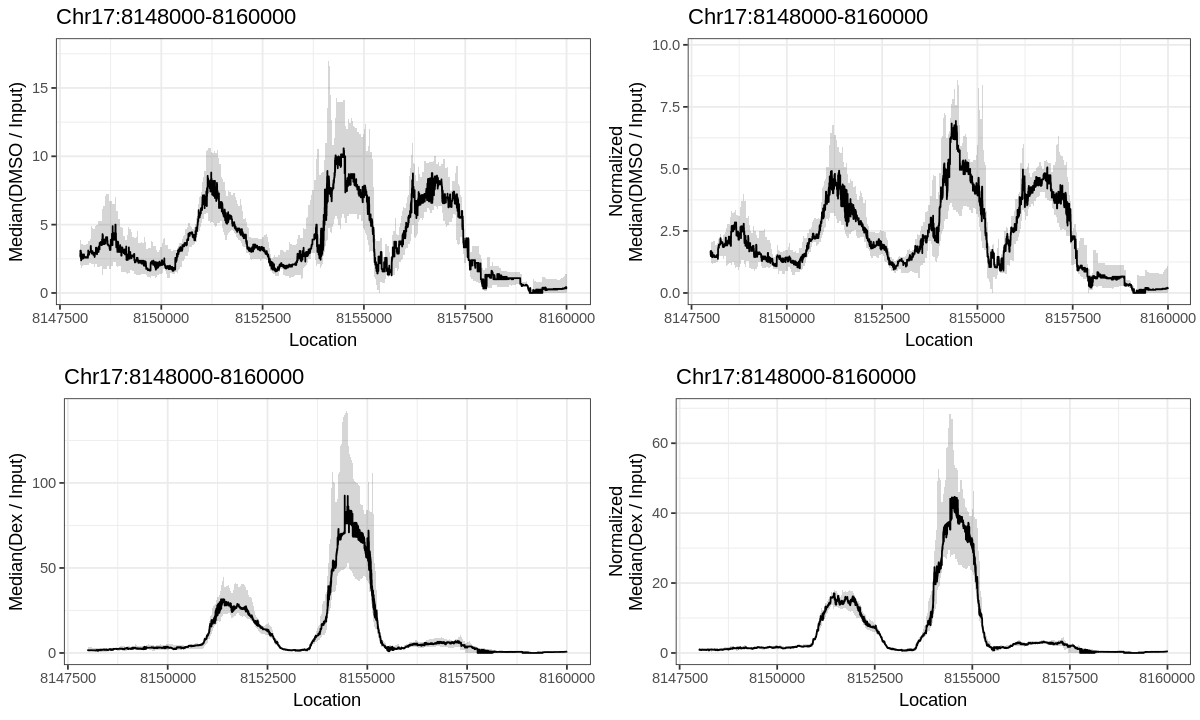

In [14]:
options(repr.plot.height=6, repr.plot.width=10)
grid.arrange(gp1, gp2, gp3, gp4, nrow=2)

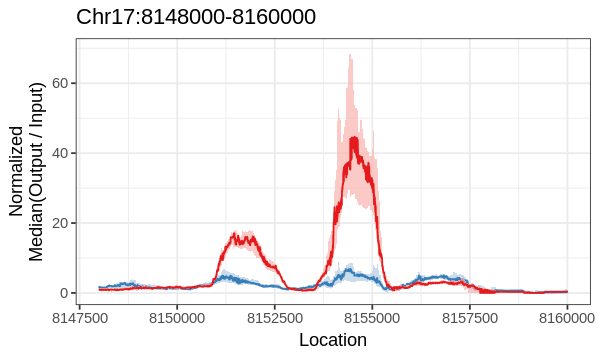

In [15]:
options(repr.plot.height=3, repr.plot.width=5)

gpt = ggplot() + 
    geom_ribbon(data=res_dmso_norm, aes(x=Loc, ymin=Q25, ymax=Q75), fill ="#b3cde3", alpha=0.7) +
    geom_line(  data=res_dmso_norm, aes(x=Loc, y=Median), size=0.5, color="#377eb8") +
    geom_ribbon(data=res_dex_norm,  aes(x=Loc, ymin=Q25, ymax=Q75), fill ="#fbb4ae", alpha=0.7) +
    geom_line(  data=res_dex_norm,  aes(x=Loc, y=Median), size=0.5, color="#e41a1c") +
    theme_bw() +
    labs(x="Location", y="Normalized\nMedian(Output / Input)", title="Chr17:8148000-8160000")
gpt

## import annnotation

In [16]:
FD_MTF = file.path(FD_ANN, "motif_jaspar_2020")
ctypes = c(col_character(), col_integer(), col_integer(), col_character(), 
           col_integer(), col_integer(), col_character())
cnames = c("Chrom", "Start", "End", "Motif",
           "Score", "nlog10_pval", "Strand")

fdiry = FD_MTF
fname = "MA0113.3.tsv"
dat_mtf_nr20_jas = read_tsv(
    file.path(fdiry, fname), 
    col_types = ctypes, 
    col_names = cnames)

fdiry = FD_MTF
fname = "MA0099.3.tsv"
dat_mtf_ap1_jas = read_tsv(
    file.path(fdiry, fname), 
    col_types = ctypes, 
    col_names = cnames)

In [17]:
FD_MTF = file.path(FD_ANN, "motif_cluster_jvierstra", "hg38_archetype_motifs_v1")
ctypes = c(col_character(), col_integer(), col_integer(), col_character(), col_double())
cnames = c("Chrom", "Start", "End", "Motif", "Score")
chrom = "chr17"
fdiry = file.path(FD_MTF, chrom)

fname = "NR_20_merge.bed"
dat_mtf_nr20_jvi = read_tsv(
    file.path(fdiry, fname), 
    col_types = ctypes, 
    col_names = cnames)

fname = "AP1_1_merge.bed"
dat_mtf_ap11_jvi = read_tsv(
    file.path(fdiry, fname), 
    col_types = ctypes, 
    col_names = cnames)

fname = "AP1_2_merge.bed"
dat_mtf_ap12_jvi = read_tsv(
    file.path(fdiry, fname), 
    col_types = ctypes, 
    col_names = cnames)

In [20]:
lst_mtf = list("NR3C1" = "red", "FOS::JUN" = "cornflowerblue")
dat1 = dat_mtf_nr20_jas %>% dplyr::filter(Chrom == "chr17", Start >= 8148000, Start <= 8160000)
dat2 = dat_mtf_ap1_jas  %>% dplyr::filter(Chrom == "chr17", Start >= 8148000, Start <= 8160000)

dat_mtf_jas = bind_rows(dat1, dat2) %>% 
    dplyr::select(Chrom, Start, End, Motif) %>% 
    distinct
dat_mtf_jas = dat_mtf_jas %>% mutate(Color = unlist(lst_mtf[Motif]))
dat_mtf_jas %>% head(10)

Chrom,Start,End,Motif,Color
chr17,8151910,8151927,NR3C1,red
chr17,8154458,8154475,NR3C1,red
chr17,8154759,8154776,NR3C1,red
chr17,8148258,8148268,FOS::JUN,cornflowerblue
chr17,8148424,8148434,FOS::JUN,cornflowerblue
chr17,8148916,8148926,FOS::JUN,cornflowerblue
chr17,8149051,8149061,FOS::JUN,cornflowerblue
chr17,8149086,8149096,FOS::JUN,cornflowerblue
chr17,8149891,8149901,FOS::JUN,cornflowerblue
chr17,8149892,8149902,FOS::JUN,cornflowerblue


In [23]:
lst_mtf = list("NR/20" = "red", "AP1/1" = "cornflowerblue")
dat1 = dat_mtf_nr20_jvi %>% dplyr::filter(Chrom == "chr17", Start >= 8148000, Start <= 8160000)
dat2 = dat_mtf_ap11_jvi %>% dplyr::filter(Chrom == "chr17", Start >= 8148000, Start <= 8160000)

dat_mtf_jvi = bind_rows(dat1, dat2) %>% 
    dplyr::select(Chrom, Start, End, Motif) %>% 
    distinct
dat_mtf_jvi = dat_mtf_jvi %>% mutate(Color = unlist(lst_mtf[Motif]))
dat_mtf_jvi %>% head(10)

Chrom,Start,End,Motif,Color
chr17,8150232,8150246,NR/20,red
chr17,8150831,8150845,NR/20,red
chr17,8151912,8151926,NR/20,red
chr17,8154459,8154474,NR/20,red
chr17,8154760,8154775,NR/20,red
chr17,8148425,8148433,AP1/1,cornflowerblue
chr17,8148917,8148925,AP1/1,cornflowerblue
chr17,8149893,8149901,AP1/1,cornflowerblue
chr17,8152141,8152149,AP1/1,cornflowerblue
chr17,8152552,8152560,AP1/1,cornflowerblue


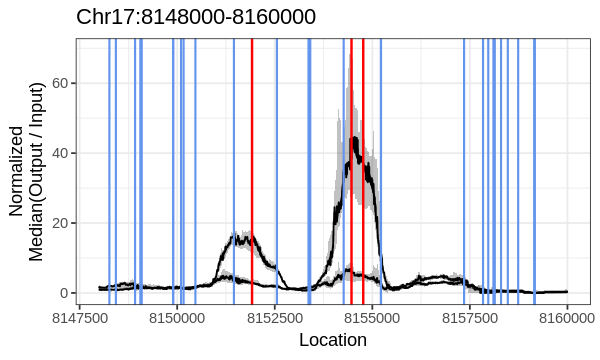

In [24]:
options(repr.plot.height=3, repr.plot.width=5)

gpt = ggplot() + 
    geom_ribbon(data=res_dmso_norm, aes(x=Loc, ymin=Q25, ymax=Q75), alpha=0.3) +
    geom_line(  data=res_dmso_norm, aes(x=Loc, y=Median), size=0.5) +
    geom_ribbon(data=res_dex_norm,  aes(x=Loc, ymin=Q25, ymax=Q75), alpha=0.3) +
    geom_line(  data=res_dex_norm,  aes(x=Loc, y=Median), size=0.5) +
    theme_bw() +
    labs(x="Location", y="Normalized\nMedian(Output / Input)", title="Chr17:8148000-8160000")

dat_mtf = dat_mtf_jas
gpt = gpt + annotate("rect",
         xmin = dat_mtf$Start, 
         xmax = dat_mtf$End, 
         ymin = -Inf, 
         ymax = Inf,
        color = dat_mtf$Color)
print(gpt)

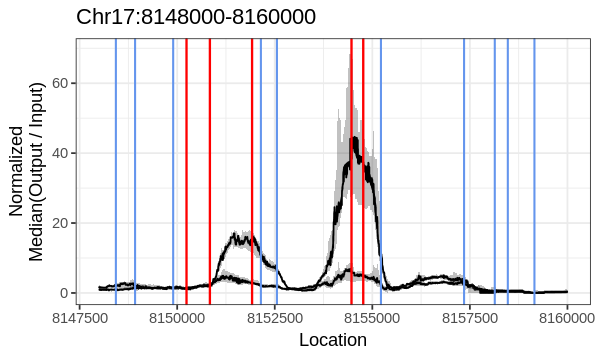

In [25]:
options(repr.plot.height=3, repr.plot.width=5)

gpt = ggplot() + 
    geom_ribbon(data=res_dmso_norm, aes(x=Loc, ymin=Q25, ymax=Q75), alpha=0.3) +
    geom_line(  data=res_dmso_norm, aes(x=Loc, y=Median), size=0.5) +
    geom_ribbon(data=res_dex_norm,  aes(x=Loc, ymin=Q25, ymax=Q75), alpha=0.3) +
    geom_line(  data=res_dex_norm,  aes(x=Loc, y=Median), size=0.5) +
    theme_bw() +
    labs(x="Location", y="Normalized\nMedian(Output / Input)", title="Chr17:8148000-8160000")

dat_mtf = dat_mtf_jvi
gpt = gpt + annotate("rect",
         xmin = dat_mtf$Start, 
         xmax = dat_mtf$End, 
         ymin = -Inf, 
         ymax = Inf,
        color = dat_mtf$Color)
print(gpt)